In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from matplotlib import pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm


In [6]:
df= pd.read_csv('energydata_complete_new.csv')

In [8]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances_log
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,0


In [7]:
df['Appliances_log']=np.where(df['Appliances'] <=60, 0,1) 

In [8]:
cols=[ 'lights','RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',  'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint']
X=df[cols]
target='Appliances_log'
y= df[target]

In [5]:
X=X.values
y=y.values

# Scale values

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting data 

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=5)

# Train-test SVC Kernel

In [60]:
def svm_func(kernel,X_train,y_train,X_test,y_test):
    svc_linear=SVC(kernel= kernel) 
    svc_linear.fit(X_train,y_train)
    y_pred=svc_linear.predict(X_test)
    print('*************Results:SVM (kernel=',kernel,')*********************')
    print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
    print('Train score :', metrics.accuracy_score(y_train,svc_linear.predict(X_train)))
    print('Confusion matrix:')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

In [24]:
from sklearn.model_selection import cross_val_score

In [61]:
svm_func('linear', X_train,y_train,X_test,y_test)

*************Results:SVM (kernel= linear )*********************
Accuracy Score: 0.7535889207904071
Train score : 0.7687128999565658
Confusion matrix:
[[2562  634]
 [ 825 1900]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      3196
           1       0.75      0.70      0.72      2725

   micro avg       0.75      0.75      0.75      5921
   macro avg       0.75      0.75      0.75      5921
weighted avg       0.75      0.75      0.75      5921



In [62]:
svm_func('poly', X_train,y_train,X_test,y_test)

C:\Users\harki\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


*************Results:SVM (kernel= poly )*********************
Accuracy Score: 0.8120249957777402
Train score : 0.826263211234979
Confusion matrix:
[[2848  348]
 [ 765 1960]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      3196
           1       0.85      0.72      0.78      2725

   micro avg       0.81      0.81      0.81      5921
   macro avg       0.82      0.81      0.81      5921
weighted avg       0.82      0.81      0.81      5921



In [63]:
svm_func('sigmoid', X_train,y_train,X_test,y_test)

C:\Users\harki\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


*************Results:SVM (kernel= sigmoid )*********************
Accuracy Score: 0.5752406688059449
Train score : 0.5985956276241494
Confusion matrix:
[[1923 1273]
 [1242 1483]]
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      3196
           1       0.54      0.54      0.54      2725

   micro avg       0.58      0.58      0.58      5921
   macro avg       0.57      0.57      0.57      5921
weighted avg       0.58      0.58      0.58      5921



In [64]:
svm_func('rbf', X_train,y_train,X_test,y_test)

C:\Users\harki\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


*************Results:SVM (kernel= rbf )*********************
Accuracy Score: 0.8268873501097788
Train score : 0.850658751990734
Confusion matrix:
[[2794  402]
 [ 623 2102]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      3196
           1       0.84      0.77      0.80      2725

   micro avg       0.83      0.83      0.83      5921
   macro avg       0.83      0.82      0.82      5921
weighted avg       0.83      0.83      0.83      5921



# Learning curve 

In [48]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    print('Cross Validation Score :',test_scores_mean)
    print('Training Score :',train_scores_mean)

    
#     estimator.fit(X_train,y_train)
#     y_pred=estimator.predict(X_test)
#     print('test score : ', y_pred)
#     print(metrics.accuracy_score(y_test,y_pred))
#     print("Train score:",train_scores_mean)
#     print("Train score:",test_scores_mean)
#     print(confusion_matrix(y_test,y_pred))
     
    return plt



Automatically created module for IPython interactive environment


Cross Validation Score : [0.75875348 0.76055232 0.76171776 0.76237649 0.76268052]
Training Score : [0.77021546 0.76413954 0.76351491 0.76402942 0.76341525]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

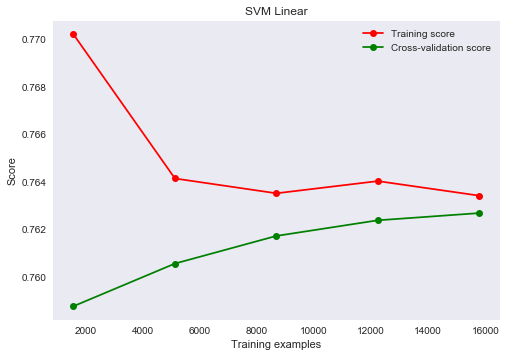

In [86]:
title = "SVM Linear"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC(kernel='linear')
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

Cross Validation Score : [0.75687864 0.79303268 0.80486445 0.81198379 0.817887  ]
Training Score : [0.8017744  0.81395439 0.81930208 0.82363711 0.82585508]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

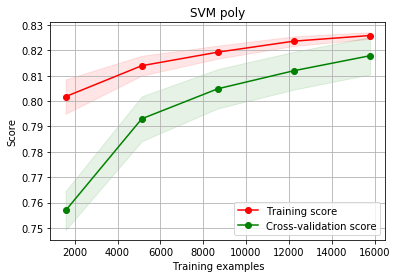

In [65]:
title = "SVM poly"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC(kernel='poly')
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

Cross Validation Score : [0.78307575 0.81687357 0.82731188 0.83402584 0.83767418]
Training Score : [0.82680608 0.83866693 0.84283082 0.84749489 0.84939828]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

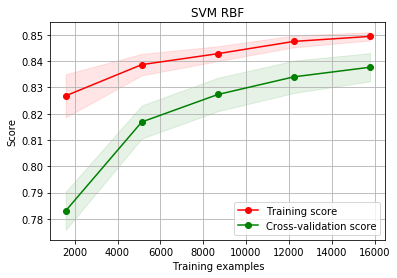

In [66]:
title = "SVM RBF"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC()
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

Cross Validation Score : [0.60182402 0.59341327 0.59363283 0.59059281 0.58908968]
Training Score : [0.60738595 0.59505458 0.59373437 0.59078935 0.59180541]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

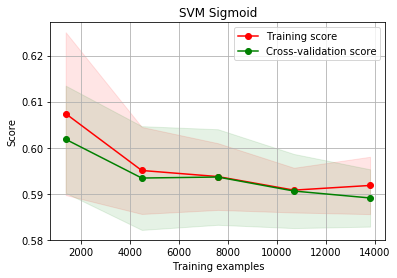

In [69]:
title = "SVM Sigmoid"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

estimator = SVC(kernel='sigmoid')
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

# Decision Trees

In [17]:
X_train, X_test, y_train, y_test = train_test_split(  
    X, y, test_size = 0.3, random_state = 100) 

In [110]:
def train_using_diff_criterion(criterion,X_train, X_test, y_train,y_test,n): 
    clf_gini = DecisionTreeClassifier(criterion = criterion, 
            random_state = 100,max_depth=n, min_samples_leaf=5) 
    model=clf_gini.fit(X_train, y_train) 
    y_pred=model.predict(X_test)
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Test Score : ", 
    accuracy_score(y_test,y_pred)*100) 
    print('Train score :', metrics.accuracy_score(y_train,model.predict(X_train)))
      
    print("Report : ", 
    classification_report(y_test, y_pred))

In [111]:
train_using_diff_criterion("gini",X_train, X_test, y_train,y_test,22)

Confusion Matrix:  [[2755  441]
 [ 502 2223]]
Test Score :  84.07363621009965
Train score : 0.9312291877805126
Report :                precision    recall  f1-score   support

           0       0.85      0.86      0.85      3196
           1       0.83      0.82      0.83      2725

   micro avg       0.84      0.84      0.84      5921
   macro avg       0.84      0.84      0.84      5921
weighted avg       0.84      0.84      0.84      5921



In [93]:
X_train.shape

(13814, 22)

# Learning Curve

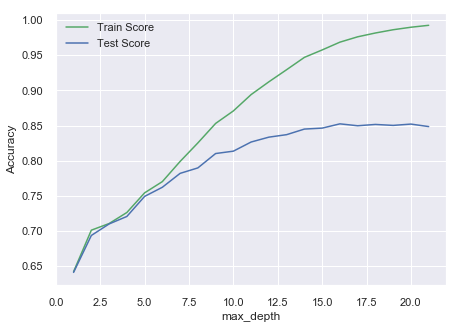

In [112]:
sns.set(rc={'figure.figsize':(7,5)})

train_score_array = []
test_score_array = []

for n in range(1,22):
    dtree = DecisionTreeClassifier(criterion = "gini", max_depth=n)
    dtree.fit(X_train, y_train)
    train_score_array.append(dtree.score(X_train, y_train))
    test_score_array.append(dtree.score(X_test, y_test))
    
x_axis = range(1,22)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

In [92]:
train_using_diff_criterion("gini",X_train, X_test, y_train,y_test)

Confusion Matrix:  [[2781  415]
 [ 524 2201]]
Accuracy :  84.14119236615436
Report :                precision    recall  f1-score   support

           0       0.84      0.87      0.86      3196
           1       0.84      0.81      0.82      2725

   micro avg       0.84      0.84      0.84      5921
   macro avg       0.84      0.84      0.84      5921
weighted avg       0.84      0.84      0.84      5921



In [60]:
train_using_diff_criterion("entropy",X_train, X_test, y_train,y_test)

Confusion Matrix:  [[2776  420]
 [ 517 2208]]
Accuracy :  84.17497044418172
Report :               precision    recall  f1-score   support

          0       0.84      0.87      0.86      3196
          1       0.84      0.81      0.82      2725

avg / total       0.84      0.84      0.84      5921



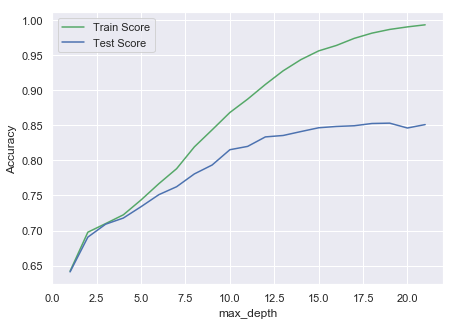

In [12]:
sns.set(rc={'figure.figsize':(7,5)})

train_score_array = []
test_score_array = []

for n in range(1,22):
    dtree = DecisionTreeClassifier(criterion = "entropy", max_depth=n)
    dtree.fit(X_train, y_train)
    train_score_array.append(dtree.score(X_train, y_train))
    test_score_array.append(dtree.score(X_test, y_test))
    
x_axis = range(1,22)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

Cross Validation Score : [0.74068913 0.80402838 0.83194832 0.84593362 0.85637193]
Training Score : [0.99917617 0.99602417 0.99469078 0.991132   0.99039144]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

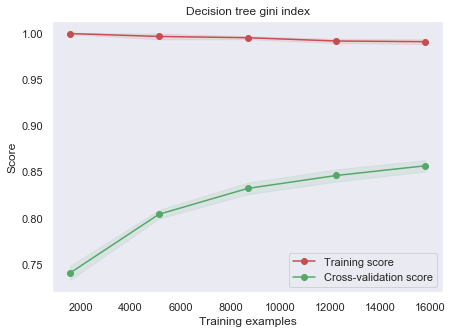

In [18]:
title = "Decision tree gini index"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(criterion = "gini", max_depth=20)
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

Cross Validation Score : [0.74236129 0.8049658  0.83430454 0.84844185 0.85774006]
Training Score : [0.99961977 0.99370493 0.99090176 0.9891132  0.98776919]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

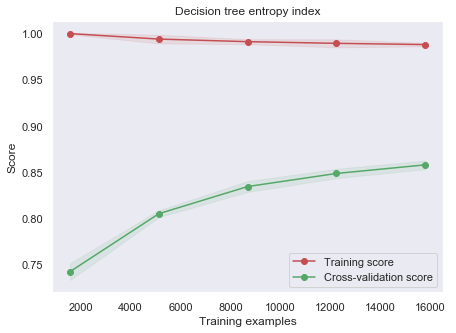

In [49]:
title = "Decision tree entropy index"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(criterion = "entropy", max_depth=20)
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

In [52]:
Score =[0.74236129, 0.8049658, 0.83430454, 0.84844185, 0.85774006]
np.mean(Score)

0.817562708

# 2. Boosting- GBM


In [48]:
import matplotlib.pylab as plt


In [21]:
def cal_gbm(X_train,y_train,X_test,y_test):
    model=GradientBoostingClassifier(max_depth=20, learning_rate= 0.3,random_state=123 )
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=metrics.accuracy_score(y_test,y_pred)
    predictors=X_train.columns
    feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    print('Train score :', metrics.accuracy_score(y_train,model.predict(X_train)))
    print('Test score:',score)

Train score : 1.0
Test score: 0.8635365647694646


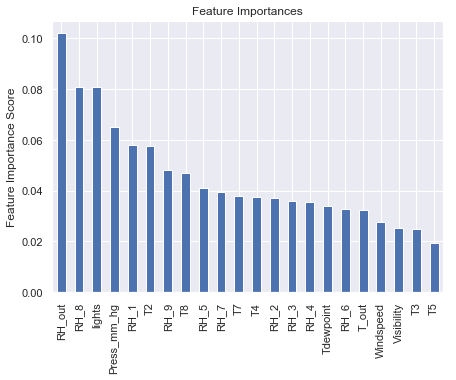

In [22]:
cal_gbm(X_train,y_train,X_test, y_test)

Cross Validation Score : [0.74137319 0.74763111 0.74856853 0.74856853 0.74899924]
Training Score : [0.77915082 0.7623855  0.75632846 0.75469555 0.75475044]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

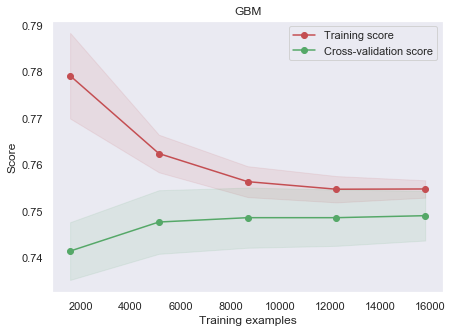

In [53]:
title = "GBM"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GradientBoostingClassifier(max_depth=20, learning_rate= 0.2,random_state=123 )
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

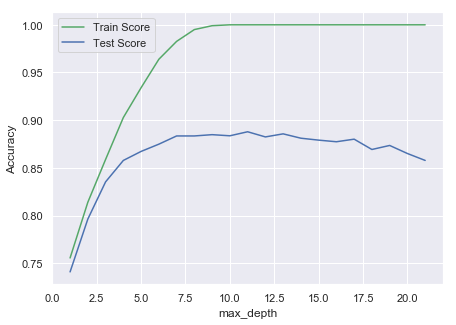

In [55]:
sns.set(rc={'figure.figsize':(7,5)})

train_score_array = []
test_score_array = []

for n in range(1,22):
    dtree = GradientBoostingClassifier(max_depth=n, learning_rate= 0.2,random_state=123 )
    dtree.fit(X_train, y_train)
    train_score_array.append(dtree.score(X_train, y_train))
    test_score_array.append(dtree.score(X_test, y_test))
    
x_axis = range(1,22)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()